In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import json

## Lets load the data


In [3]:
loaddata = pd.read_csv("../Accident_Stats/US_Accidents_Dec21_updated.csv")

In [4]:
loaddata.head()   #see datat and start looking to filter out data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
print(np.unique(loaddata['Severity']))

[1 2 3 4]


# lets find some missing data.. which columns


In [9]:
missing_data = loaddata.isna().sum().sort_values(ascending=False)
missing_data[missing_data !=0]

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
dtype: int64

In [3]:
md = [feature for feature in loaddata.columns if loaddata[feature].isnull().sum()>1]

for feature in md:
    print(feature, np.round(loaddata[feature].isnull.mean(), 4), '% missing values')

NameError: name 'loaddata' is not defined

# what percentage is missing?

In [147]:
percentage_missing = missing_data[missing_data!=0] / len(loaddata) * 100
percentage_missing
#missing data can be dropped or nulled, or filled with averages, lets check hightest occurances of accidents based on cities

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

In [30]:
acc_by_city= loaddata['City'].value_counts()
acc_by_city[:20]


Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Miami'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Orlando'),
  Text(3, 0, 'Dallas'),
  Text(4, 0, 'Houston'),
  Text(5, 0, 'Charlotte'),
  Text(6, 0, 'Sacramento'),
  Text(7, 0, 'San Diego'),
  Text(8, 0, 'Raleigh'),
  Text(9, 0, 'Minneapolis'),
  Text(10, 0, 'Portland'),
  Text(11, 0, 'Nashville'),
  Text(12, 0, 'Austin'),
  Text(13, 0, 'Baton Rouge'),
  Text(14, 0, 'Phoenix'),
  Text(15, 0, 'Saint Paul'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Atlanta'),
  Text(18, 0, 'Jacksonville'),
  Text(19, 0, 'Richmond')])

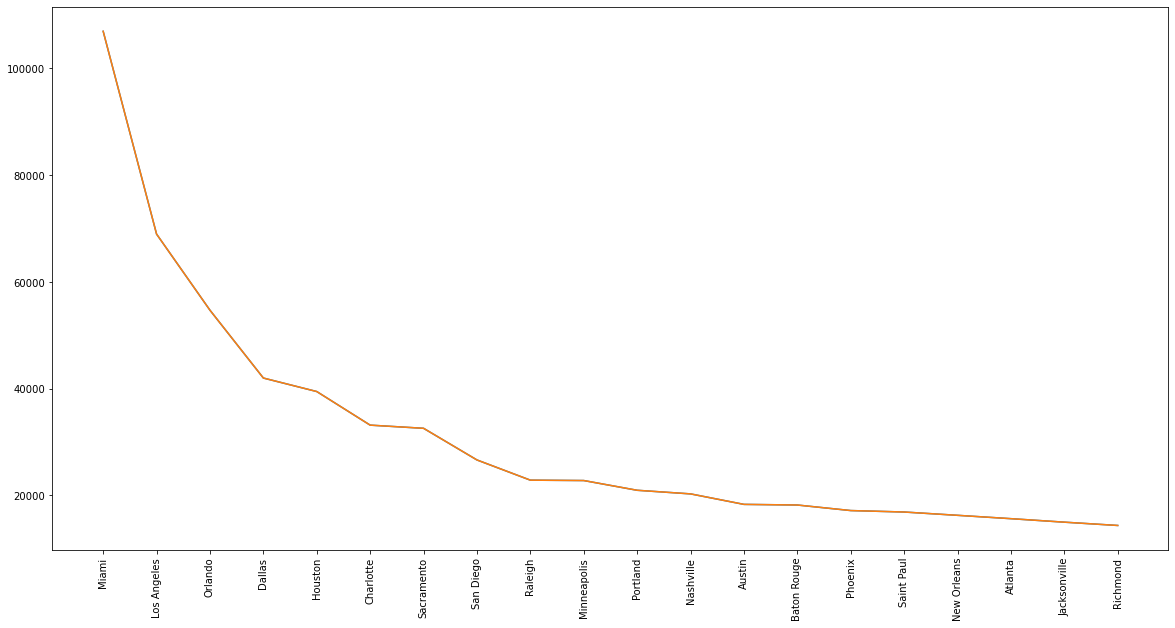

In [31]:
x = acc_by_city.index[:20]
y = acc_by_city.values[:20]
plt.plot(x, y)
acc_by_city[:20].plot(figsize=(20,10))
plt.gca()
plt.xticks(rotation=90)

#print(acc_by_city[:20])
#acc_by_city.index[0]

In [32]:
loaddata[["Start_Time"]].describe() # taking a look

,Start_Time
count,2845342
unique,1959333
top,2021-01-26 16:16:13
freq,214


# General Hypothesis:  Determine what hours are common to high probability accidents

In [300]:
ld_Start_Time = pd.to_datetime(loaddata['Start_Time'])
type(ld_Start_Time)
ld_hour = ld_Start_Time.dt.hour
ld_hours_total = ld_hour.value_counts()
ld_hours_total = ld_hours_total.sort_index()
ld_hours_total

0      68800
1      59370
2      55443
3      48656
4      51805
5      80303
6     111160
7     135191
8     130879
9     108779
10    103926
11    113271
12    143715
13    166473
14    191480
15    214264
16    218385
17    220358
18    168982
19    116911
20     94682
21     87078
22     81188
23     74243
Name: Start_Time, dtype: int64

Text(0.5, 1.0, 'Accident Hours')

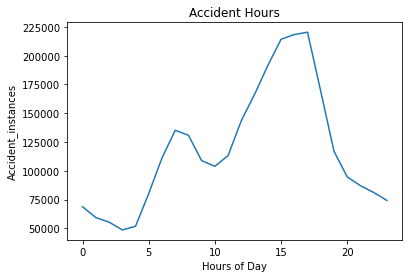

In [301]:
ld_hours_total.plot()
plt.xlabel("Hours of Day")
plt.ylabel("Accident_instances")
plt.title("Accident Hours")

Text(0.5, 1.0, 'Accident Hours between 3pm -6pm')

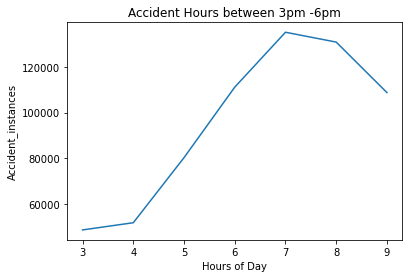

In [304]:
ld_hours_total[3:10].plot()
plt.xlabel("Hours of Day")
plt.ylabel("Accident_instances")
plt.title("Accident Hours between 3pm -6pm")

Text(0.5, 1.0, 'Accident Hours between 3pm -6pm')

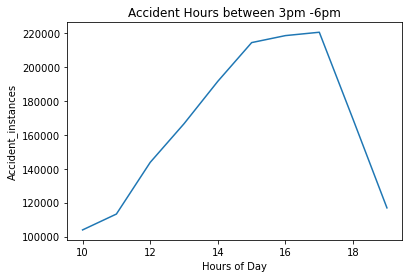

In [306]:
ld_hours_total[10:20].plot()
plt.xlabel("Hours of Day")
plt.ylabel("Accident_instances")
plt.title("Accident Hours between 3pm -6pm")

In [319]:
ld_Start_Time_day = ld_Start_Time.dt.
ld_Start_Time_day.value_counts()

23    106831
22    103229
18     98804
30     98654
19     98386
24     97655
12     96024
20     95913
10     95727
16     94945
21     94656
11     94207
8      93956
27     93680
17     93487
15     93074
7      92982
28     92694
29     92676
6      92308
9      91779
26     91741
13     91570
14     88340
5      87969
25     85901
3      85070
4      83763
1      82885
2      82479
31     53957
Name: Start_Time, dtype: int64

# We have common hours of daily accidents, lets dig deeper to determine other factors of these accidents.  Let's review weather conditions.

In [314]:
## weather_conditions = loaddata['Weather_Condition']
wed_con = weather_conditions.value_counts()
wed_con[:20]

Fair                       1107194
Mostly Cloudy               363959
Cloudy                      348767
Partly Cloudy               249939
Clear                       173823
Light Rain                  128403
Overcast                     84882
Scattered Clouds             45132
Light Snow                   43752
Fog                          41226
Haze                         36354
Rain                         31044
Fair / Windy                 15195
Heavy Rain                   11824
Smoke                         7200
Light Drizzle                 7041
Thunder in the Vicinity       6944
Cloudy / Windy                6839
T-Storm                       6546
Mostly Cloudy / Windy         6297
Name: Weather_Condition, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Fair'),
  Text(1, 0, 'Mostly Cloudy'),
  Text(2, 0, 'Cloudy'),
  Text(3, 0, 'Partly Cloudy'),
  Text(4, 0, 'Clear'),
  Text(5, 0, 'Light Rain'),
  Text(6, 0, 'Overcast'),
  Text(7, 0, 'Scattered Clouds'),
  Text(8, 0, 'Light Snow'),
  Text(9, 0, 'Fog'),
  Text(10, 0, 'Haze'),
  Text(11, 0, 'Rain'),
  Text(12, 0, 'Fair / Windy'),
  Text(13, 0, 'Heavy Rain'),
  Text(14, 0, 'Smoke'),
  Text(15, 0, 'Light Drizzle'),
  Text(16, 0, 'Thunder in the Vicinity'),
  Text(17, 0, 'Cloudy / Windy'),
  Text(18, 0, 'T-Storm'),
  Text(19, 0, 'Mostly Cloudy / Windy')])

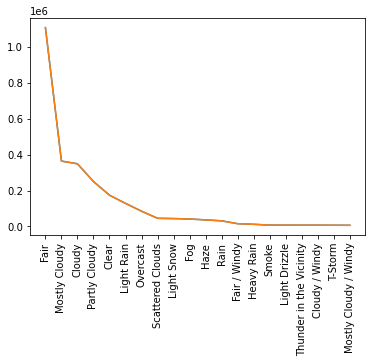

In [316]:
plt.plot(wed_con.index[:20], wed_con.values[:20])
wed_con[:20].plot()
plt.gca()
plt.xticks(rotation=90)

In [21]:
loaddata.drop(loaddata[['Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']], axis=1, inplace=True)

In [33]:
loaddata.shape


(2845342, 47)

In [57]:
#20 Safest Cities per accidents
safest_cities = acc_by_city[:-20]
safe_cities_list = safest_cities.value_counts()>1

In [58]:
safe_cities_list[safe_cities_list for sfc in safe_cities_list ]

1        True
2        True
3        True
4        True
5        True
        ...  
1129    False
1128    False
1124    False
1120    False
691     False
Name: City, Length: 1224, dtype: bool

# Conclusion:  
Most accidents occur during 05am-08am, and between 3pm-5pm, during commuter hrs.
20 most dangerous cities for accidents are in highly populated regions of the US.
20 safest cities will be noted at the bottom.
Weather wise... the highest occurrances of accidents were on fair weather days.
